In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

- importing data

In [3]:
df = pd.read_csv("spotify_data.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


- Exploring the data 

In [4]:
df.shape

(2000, 18)

In [5]:
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [6]:
df.duplicated().sum()

59

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1941 non-null   object 
 1   song              1941 non-null   object 
 2   duration_ms       1941 non-null   int64  
 3   explicit          1941 non-null   bool   
 4   year              1941 non-null   int64  
 5   popularity        1941 non-null   int64  
 6   danceability      1941 non-null   float64
 7   energy            1941 non-null   float64
 8   key               1941 non-null   int64  
 9   loudness          1941 non-null   float64
 10  mode              1941 non-null   int64  
 11  speechiness       1941 non-null   float64
 12  acousticness      1941 non-null   float64
 13  instrumentalness  1941 non-null   float64
 14  liveness          1941 non-null   float64
 15  valence           1941 non-null   float64
 16  tempo             1941 non-null   float64
 17  

In [9]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [10]:
df.describe(include='object')

,artist,song,genre
count,1941,1941,1941
unique,835,1879,59
top,Drake,Sorry,pop
freq,23,4,416


In [11]:
df[df['song'].duplicated()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
268,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,161240,False,2002,56,0.838,0.764,7,-5.076,0,0.0586,0.086200,0.000122,0.0906,0.924,133.592,pop
371,No Doubt,It's My Life,226053,False,2003,60,0.612,0.735,8,-5.074,0,0.0282,0.002020,0.001180,0.3280,0.783,126.326,"rock, pop"
470,Avril Lavigne,Don't Tell Me,202013,False,2004,58,0.523,0.795,4,-2.920,1,0.0386,0.004620,0.000000,0.3580,0.484,144.106,pop
540,David Banner,Play,230133,True,2005,52,0.837,0.658,1,-8.013,0,0.1260,0.000213,0.122000,0.2430,0.586,95.027,"hip hop, pop"
547,Backstreet Boys,Incomplete,239586,False,2005,63,0.437,0.589,4,-4.834,1,0.0331,0.231000,0.000000,0.0768,0.165,133.631,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,Cardi B,Bodak Yellow,223712,True,2018,72,0.926,0.703,11,-6.337,0,0.1030,0.065900,0.000000,0.2310,0.485,125.022,"hip hop, pop"
1857,Jonas Blue,Rise,194407,False,2018,70,0.687,0.785,1,-4.650,1,0.0333,0.327000,0.000000,0.2030,0.655,106.046,"pop, Dance/Electronic"
1906,Halsey,Without Me,201660,True,2018,77,0.752,0.488,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.533,136.041,"pop, Dance/Electronic"
1992,Normani,Motivation,193837,False,2019,71,0.599,0.887,4,-3.967,1,0.0984,0.019200,0.000001,0.3000,0.881,170.918,"pop, R&B"


In [12]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

- Exploratory Data Analysis 

In [13]:
#Most popular artists 

top_artists = df.groupby("artist")["popularity"].sum().reset_index()
top_artists = top_artists.sort_values(by="popularity", ascending=False).head(10)

fig = px.bar(
    top_artists,
    x="artist",
    y="popularity",
    title="Top 10 Artists by Popularity",
    labels={"popularity": "Total Popularity", "artist": "Artist"},
    color="popularity"
)

fig.show()

In [14]:
fig = px.histogram(df, x="popularity", nbins=30, title="Distribution of Popularity")
fig.show()

- The leftmost bar (popularity = 0) is very high, meaning many songs have a popularity score of zero (possibly inactive or less-streamed songs).
- Most Songs Have Moderate to High Popularity.

In [15]:
df_zero_pop = df[df["popularity"] == 0]

artist_counts = df_zero_pop["artist"].value_counts().reset_index()
artist_counts.columns = ["artist", "count"]

fig = px.bar(artist_counts.head(10), x="artist", y="count", 
             title="Top Artists with Zero Popularity Songs", 
             text="count", color="count", color_continuous_scale="reds")

fig.update_layout(xaxis_tickangle=-45)
fig.show()


- these are not unknown artists so probably the 0 popularity values are missing values 

In [16]:
#replace the 0 popular values by this artits average popularity

#artist_counts = df_zero_pop["artist"].value_counts().reset_index()
#artist_counts.columns = ["artist", "count"]
#df["artist_avg_pop"] = df.groupby("artist")["popularity"].sum()/artist_counts["artist"]

artist_avg_popularity = df.groupby("artist")["popularity"].mean().to_dict()
df["popularity"] = df.apply(lambda row: artist_avg_popularity[row["artist"]] if row["popularity"] == 0 else row["popularity"], axis=1)

In [17]:
df["mode"] = df["mode"].replace({1: "Major", 0: "Minor"})
fig = px.pie(df, names="mode", title="Proportion of Songs by Mode")
fig.show()

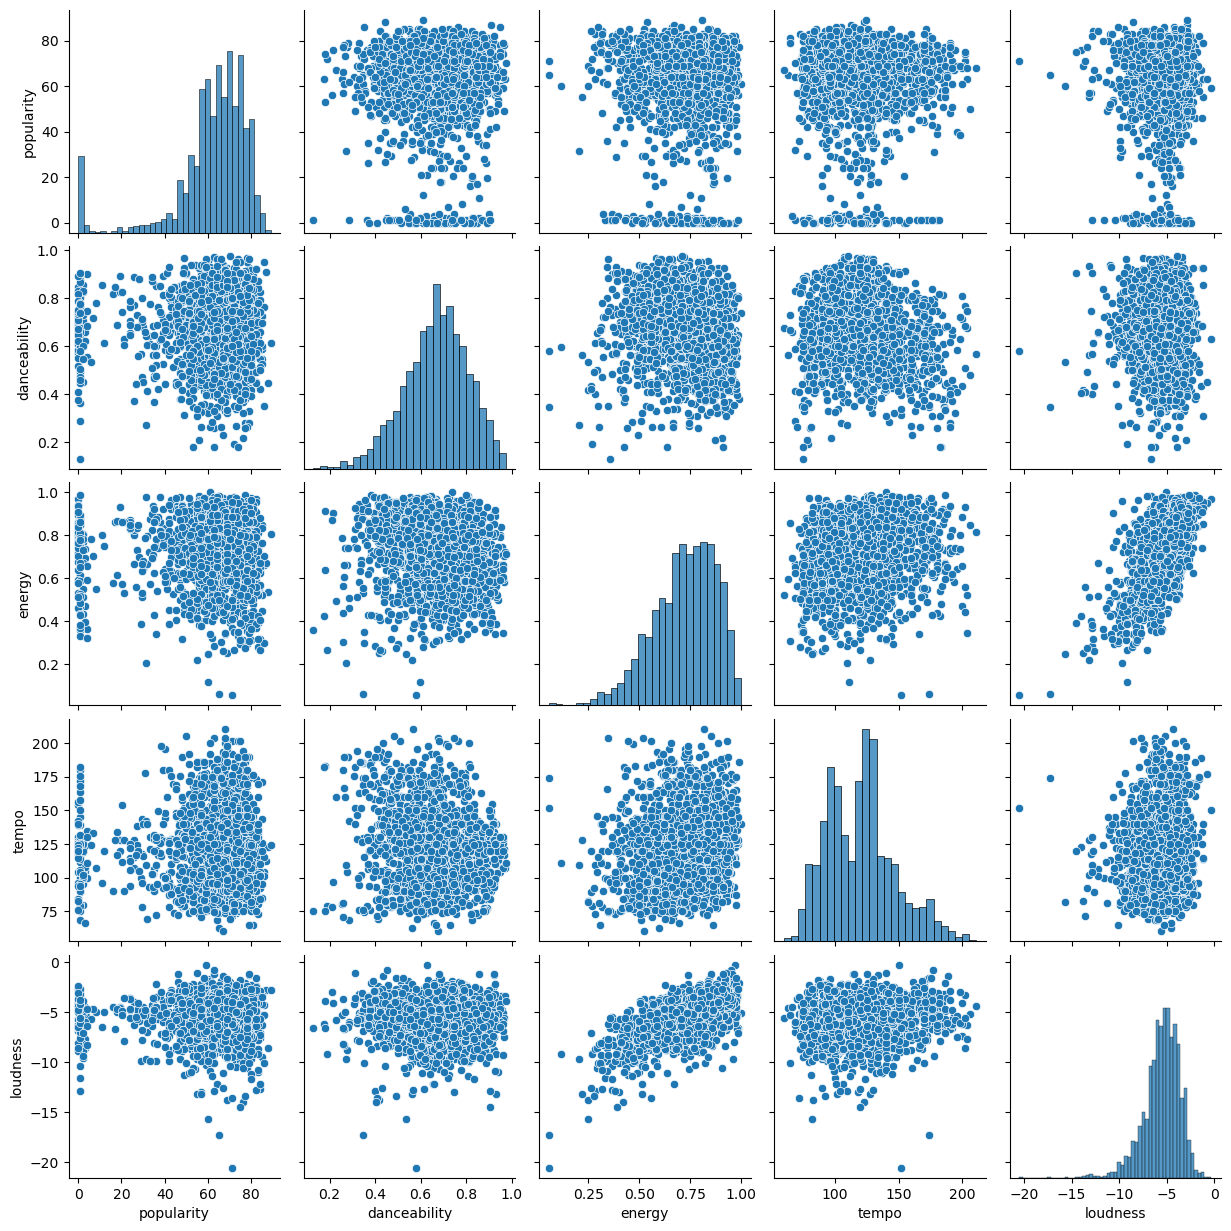

In [18]:
sns.pairplot(df[["popularity", "danceability", "energy", "tempo", "loudness"]])
plt.show()

In [19]:
corr_matrix = df[["popularity", "danceability", "energy", "tempo", "loudness"]].corr()
fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale="viridis")
fig.show()

In [ ]:
fig = px.scatter_3d(df, x="danceability", y="energy", z="popularity",
                     color="popularity", opacity=0.7, title="Popularity vs Danceability vs Energy")
fig.show()